<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Competitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

1- Problem, 2- Data, 3- Model, 4-Submission, 5- Leaderboard


Go to Kaggle and download Data. We are going to work on: 

https://www.kaggle.com/c/demand-forecasting-kernels-only/notebooks


In [ ]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('/content/train.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (173155, 4)
         date  store  item  sales
0  2013-01-01    1.0   1.0   13.0
1  2013-01-02    1.0   1.0   11.0
2  2013-01-03    1.0   1.0   14.0
3  2013-01-04    1.0   1.0   13.0
4  2013-01-05    1.0   1.0   10.0


In [ ]:
# Read the test data
test = pd.read_csv('/content/test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())


Train columns: ['date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [ ]:
# Read the sample submission file
sample_submission = pd.read_csv('/content/sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


# What problem type?

Let's looks at the target distribution values.

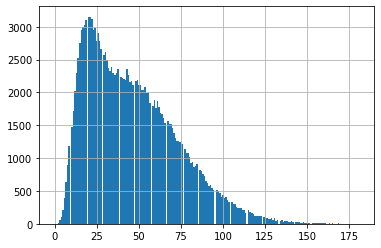

In [ ]:
import matplotlib.pyplot as plt


train.sales.hist(bins=200)
plt.show()

# How to submit the predictions to kaggle?

## Train the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

## Predict, assign into DataFrame columns and to_csv 

In [ ]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

test.head()

# Trade-off curve a XGBoost model

In [ ]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 25,
          'silent': 1}

# Train xgboost model
xg_depth_25 = xgb.train(params=params, dtrain=dtrain)

Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality.

For this purpose, you will measure the quality of each model on both the train data and the test data.

 To measure the quality of the models you will use Mean Squared Error (MSE). 

In [ ]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15, xg_depth_18]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

NameError: ignored

# EDA Taxi dataSet

1- Size of the data 

2- Properties of the target variable

3- Properties of the features

4- Generate ideas for feature engineering

In [ ]:
# Taxi prediction data


ttrain = pd.read_csv('https://assets.datacamp.com/production/repositories/4443/datasets/1abe6ab7c7c0e880a2f6febcae946a33a9ef5e31/taxi_train_chapter_4.csv')

display(ttrain.head())

ttest = pd.read_csv('https://assets.datacamp.com/production/repositories/4443/datasets/f52d553ec3d3a8b469d58d20bf70a1b401765a30/taxi_test_chapter_4.csv')

ttest.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
ttrain['pick_coords'] = [list(a) for a in zip(ttrain.pickup_longitude, ttrain.pickup_latitude)]
ttrain['dropoff_coords'] = [list(a) for a in zip(ttrain.dropoff_longitude, ttrain.dropoff_latitude)]
ttrain.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pick_coords,dropoff_coords
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"[-73.844311, 40.721319]","[-73.84161, 40.71227800000001]"
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"[-74.016048, 40.711303]","[-73.979268, 40.782004]"
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"[-73.982738, 40.76127]","[-73.991242, 40.750562]"
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,"[-73.98713000000002, 40.733143]","[-73.991567, 40.758092]"
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,"[-73.96809499999998, 40.768008]","[-73.956655, 40.783762]"


In [ ]:
# Shapes of train and test data
print('Train shape:', ttrain.shape)
print('Test shape:', ttest.shape)


Train shape: (20000, 8)
Test shape: (9914, 7)


In [ ]:
ttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   fare_amount        20000 non-null  float64
 2   pickup_datetime    20000 non-null  object 
 3   pickup_longitude   20000 non-null  float64
 4   pickup_latitude    20000 non-null  float64
 5   dropoff_longitude  20000 non-null  float64
 6   dropoff_latitude   20000 non-null  float64
 7   passenger_count    20000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.2+ MB


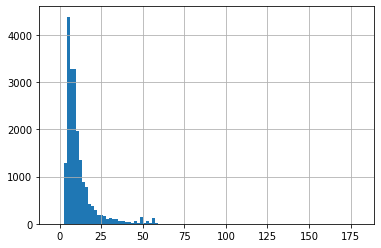

In [ ]:
# Describe the target variable

ttrain.fare_amount.hist(bins=100)
plt.show()

In [ ]:
# Describe the target variable
print(ttrain.fare_amount.describe())

# Train distribution of passengers within rides
print(ttrain.passenger_count.value_counts())

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = df.pickup_longitude,	df.pickup_latitude,	df.dropoff_longitude, df.dropoff_latitude

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

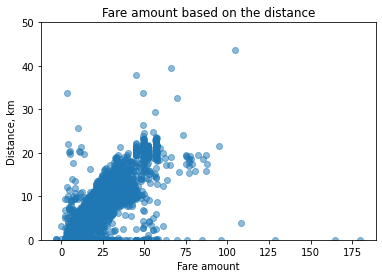

In [ ]:
# Calculate the ride distance
ttrain['distance_km'] = ttrain.apply(lambda row: haversine(row), axis=1)

# Draw a scatterplot
plt.scatter(x=ttrain['fare_amount'], y=ttrain['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

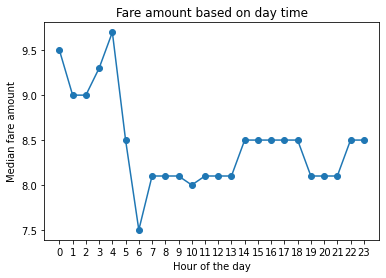

In [ ]:
# Create hour feature
ttrain['pickup_datetime'] = pd.to_datetime(ttrain.pickup_datetime)
ttrain['hour'] = ttrain.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = ttrain.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

We see that prices are a bit higher during the night. It is a good indicator that we should include the "hour" feature in the final model, or at least add a binary feature "is_night".

# K-Fold validations

### K-fold on Time series

We can't use common cross validation, because we have time series data.cannot put the future to train as it where the past.

In [ ]:
# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

## K-Fold comparison mean + std

We compare with mean + std and not only with mean of loss for each cv.

we usually compute np.mean of loss or accuracy scores on all cross_validation fold. We compare the results on each model to select the best performer one. It's better to compare the mean + std as a metric for comparison.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

# Modeling Stage of a competition

We first 1) understood the problem, 2) made EDA and 3) selected Local Validation Scheme.

In this stage we are going to focus on 5) Modeling.

This stage is the longest one in the competition, and kind of feels like a marathon.

During the modeling loop we pre-process data, create new features, enhance models, apply tricks and go all over again. 

This is the modeling loop.

1- pre-process data, 
2- create new features, 
3- enhance models, 
4- apply tricks
5- Observe validation scores and public validation on the competition, and return the loop



Change one step at a time

## Feature engineering

"House Prices: Advanced Regression Techniques". The goal of this competition is to predict the price of the house based on its properties. It's a regression problem with Root Mean Squared Error as an evaluation metric.

Your goal is to create new features and determine whether they improve your validation score.

In [ ]:
train = pd.read_csv()

In [ ]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train))

# Find the total area of the house
train['TotalArea'] = train['TotalBsmtSF'] + train['FirstFlrSF'] + train['SecondFlrSF']
print('RMSE with total area:', get_kfold_rmse(train))

# Find the area of the garden
train['GardenArea'] = train['LotArea'] - train['FirstFlrSF']
print('RMSE with garden area:', get_kfold_rmse(train))

# Find the total number of bathrooms
# train['TotalBath'] = train['FullBath'] + train['HalfBath']
# print('RMSE with number of bathrooms:', get_kfold_rmse(train))


<script.py> output:
    RMSE before feature engineering: 36029.39
    RMSE with total area: 35073.2
    RMSE with garden area: 34413.55
    RMSE with number of bathrooms: 34506.78

You've created three new features. Here you see that house area improved the RMSE by almost $1,000. Adding garden area improved the RMSE by another $600. However, with the total number of bathrooms, the RMSE has increased. It means that you keep the new area features, but do not add "TotalBath" as a new feature.

Your objective is to generate date features from the pickup datetime. Recall that it's better to create new features for train and test data simultaneously. After the features are created, split the data back into the train and test DataFrames. Here it's done using pandas' isin() method.


In [ ]:
# Taxi prediction data

ttrain = pd.read_csv('https://assets.datacamp.com/production/repositories/4443/datasets/1abe6ab7c7c0e880a2f6febcae946a33a9ef5e31/taxi_train_chapter_4.csv')

display(ttrain.head())

ttest = pd.read_csv('https://assets.datacamp.com/production/repositories/4443/datasets/f52d553ec3d3a8b469d58d20bf70a1b401765a30/taxi_test_chapter_4.csv')

ttest.head()

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
# Concatenate train and test together
taxi = pd.concat([ttrain, ttest])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'], utc=True)

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi['id'].isin(ttrain['id'])]
new_test = taxi[taxi['id'].isin(ttest['id'])]

# Label encoding

House prices advanced regression techniques

## Label encoder for binary categorical variable.

It can be ued for multiple categorical variables but this is not good for machine learning models. 0,1,2,3,4,5... etc

In [ ]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Binary variable
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['CentralAir', 'CentralAir_enc']].head())

## One hot encoding

In [ ]:
# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

## IMPORTANT!: Target encoding

Really important for Kaggle competitions

This works for high cardinality categorical features. (Over 10 different categories)

We can do one hot encoder but create to many categorical variables.

The alternative is target encoding that creates a single column but it also introduces the correlation between the categories and the target variable.

Mean target encoding is the most frequently used on Kaggle.

## For binary Classification

In [ ]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [ ]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [ ]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

I have a categorical feature game_id with 541 unique variables.

In [ ]:
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))

In [14]: cv_train.game_id_enc
Out[14]: 
0       0.476136
1       0.476136
2       0.476562
3       0.476562
4       0.439388
5       0.403906
6       0.439388
7       0.476136
8       0.476562
9       0.484844
          ...   

Name: game_id_enc, Length: 8000, dtype: float64

binary classification is just a single special case. Target encoding could be applied to any target variable type:

1- For binary classification usually mean target encoding is used

2- For regression mean could be changed to median, quartiles, etc.

3-For multi-class classification with N classes we create N features with target mean for each category in one vs. all fashion

The mean_target_encoding() function you've created could be used for any target type specified above. Let's apply it for the regression problem on the example of House Prices Kaggle competition.

In [ ]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

In [ ]:
# you've encoded categorical feature in such a manner that there is now 
# a correlation between category values and target variable.

<script.py> output:
         RoofStyle  RoofStyle_enc
    0        Gable  171565.947836
    1          Hip  217594.645131
    98     Gambrel  164152.950424
    133       Flat  188703.563431
    362    Mansard  180775.938759
    1053      Shed  188267.663242

 you've encoded categorical feature in such a manner that there is now a correlation between category values and target variable.

# Missing value

Even with XGBoosting and LightGBM can treat missing data without any pre-processing. However, always pre-process the missing values in order to improve model performance.

## Imputing

*Imputing Numerical Data*

We can impute with mean or median but we are going to loose the information that that value was actually missing, therefore we can use a constant value imputation like -999. While **-999 will lower linear model performances, it's a good choice for Tree-based models.**

*Imputing Categorical Data*

We can fill in the most frequent category in the data or create a new category for the missing values.

In [ ]:

# Find the number of missing values in each column
print(df.isnull().sum())

Numerical feature "price" will be encoded with a mean value of non-missing prices.

In [ ]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create mean imputer
mean_imputer = SimpleImputer(strategy='mean')

# Price imputation
rental_listings[['price']] = mean_imputer.fit_transform(rental_listings[['price']])

Categorical variable create a new feature MISSING.

In [ ]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create constant imputer
constant_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')

# building_id imputation
rental_listings[['building_id']] = constant_imputer.fit_transform(rental_listings[['building_id']])

# Feature engineering has many times more impact than hyperparameter tuning.

But in Deep Learning competitions we only have to optimize hyperparameters, because there is no feature engineering.

# Hyperparameter Optimization

Once we are out of ideas for feature engineering, we move on to hyperparameter optimization. 

But in Deep Learning competitions we only have to optimize hyperparameters, because there is no feature engineering.

Go to hyperparameter optimization course

# Model ensembling

Most Kaggle top solutiong utilize multiple machine learning models in combination. 



You will start creating model ensembles with a blending technique.

Your goal is to train 2 different models on the New York City Taxi competition data. Make predictions on the test data and then blend them using a simple arithmetic mean.

## Averaging multiple model predictions

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(train[features], train.fare_amount)

# Train a Random Forest model
rf = RandomForestRegressor().fit(train[features], train.fare_amount)

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test['gb_pred'] + test['rf_pred']) / 2
print(test[['gb_pred', 'rf_pred', 'blend']].head(3))

## Stacking approach

Now it's time for stacking. To implement the stacking approach, you will follow  6 steps:

Split train data into two parts
Train multiple models on Part 1
Make predictions on Part 2
Make predictions on the test data
Train a new model on Part 2 using predictions as features
Make predictions on the test data using the 2nd level model

Split train data into two parts
Train multiple models on Part 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model
gb = GradientBoostingRegressor().fit(part_1[features], part_1.fare_amount)

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1.fare_amount)

Make predictions on Part 2
Make predictions on the test data

In [ ]:
# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2.fare_amount)

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

In [ ]:
<script.py> output:
    [0.72504358 0.27647395]

Usually, the 2nd level model is some simple model like Linear or Logistic Regressions. Also, note that you were not using intercept in the Linear Regression just to combine pure model predictions. Looking at the coefficients, it's clear that 2nd level model has more trust to the Gradient Boosting: 0.7 versus 0.3 for the Random Forest model.

# Final tips

## Save folds to the disk

save folds distribution to files

Our goal is to track the validation score during the competition. This validation score should always be calculated on the same folds.

## Save model runs

One of the possibilities could be to create a separate git commit for each model run or submission

## Save model predictions

If we start saving validation and test predictions from the vary beginning of the competition it will allow us to simply build model ensembles near the end because we store predictions for the models blending as well as features for the models stacking.

## Save performance results to track performance progress.

Comments on git commit or notes in a document.

## Use Kaggle kernels

for GPU

## Read winners solutions from the past similar competitions

## Go through baseline approaches from the past similar competitions

## Select 2 submissions 1 best on local validation and other best on public leaderboard.